In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import ipywidgets as widgets
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("dataset (MSFT).csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (7779, 7)


,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
0,2022-09-19 09:30:00-04:00,242.464996,242.479996,242.000000,242.136002,242.136002,677274.0
1,2022-09-19 09:31:00-04:00,242.190002,242.589996,242.100006,242.544998,242.544998,81735.0
2,2022-09-19 09:32:00-04:00,242.315002,242.519104,242.190094,242.464996,242.464996,178308.0
3,2022-09-19 09:33:00-04:00,242.479996,242.615005,242.229996,242.399994,242.399994,22108.0
4,2022-09-19 09:34:00-04:00,242.169998,242.589798,242.169998,242.361206,242.361206,148771.0


In [3]:
training_set = df.iloc[:5446, 4:5].values
test_set = df.iloc[5446:, 4:5].values

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 5446):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(840, 60, 1)
X_train.shape

(5386, 60, 1)

In [5]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
169/169 [==============================] - 63s 215ms/step - loss: 0.0132
Epoch 2/100
169/169 [==============================] - 38s 224ms/step - loss: 0.0042
Epoch 3/100
169/169 [==============================] - 41s 242ms/step - loss: 0.0040
Epoch 4/100
169/169 [==============================] - 40s 236ms/step - loss: 0.0032
Epoch 5/100
169/169 [==============================] - 40s 236ms/step - loss: 0.0030
Epoch 6/100
169/169 [==============================] - 41s 242ms/step - loss: 0.0029
Epoch 7/100
169/169 [==============================] - 40s 239ms/step - loss: 0.0025
Epoch 8/100
169/169 [==============================] - 40s 238ms/step - loss: 0.0024
Epoch 9/100
169/169 [==============================] - 40s 235ms/step - loss: 0.0022
Epoch 10/100
169/169 [==============================] - 43s 252ms/step - loss: 0.0021
Epoch 11/100
169/169 [==============================] - 41s 241ms/step - loss: 0.0021
Epoch 12/100
169/169 [==============================] - 42s 251

169/169 [==============================] - 38s 224ms/step - loss: 6.9412e-04
Epoch 94/100
169/169 [==============================] - 38s 223ms/step - loss: 6.6936e-04
Epoch 95/100
169/169 [==============================] - 39s 231ms/step - loss: 6.3493e-04
Epoch 96/100
169/169 [==============================] - 38s 225ms/step - loss: 6.3750e-04
Epoch 97/100
169/169 [==============================] - 38s 224ms/step - loss: 6.6023e-04
Epoch 98/100
169/169 [==============================] - 38s 224ms/step - loss: 6.5155e-04
Epoch 99/100
169/169 [==============================] - 38s 224ms/step - loss: 6.7431e-04
Epoch 100/100
169/169 [==============================] - 36s 216ms/step - loss: 6.4521e-04


In [6]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:5446, 1:2]
dataset_test = df.iloc[5446:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 2393):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (300, 60, 1)
X_test.shape

(2333, 60, 1)


(2333, 60, 1)

In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

73/73 [==============================] - 10s 62ms/step


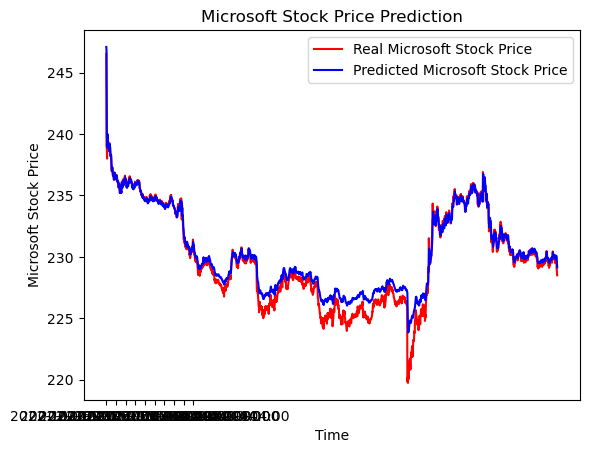

In [8]:
# Visualising the results
plt.plot(df.loc[5446:, 'Unnamed: 0'],dataset_test.values, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(df.loc[5446:, 'Unnamed: 0'],predicted_stock_price, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.show()

In [9]:
predicted_prices_df =pd.DataFrame(predicted_stock_price, columns = ['Price'])
predicted_prices_df.to_csv (r'C:\Users\kayra\OneDrive\Desktop\Stonks 2022\2022-2023-Stocks-Prediction\Predictions\Close Price Prediction.csv', index = False, header=True)

OSError: Cannot save file into a non-existent directory: 'C:\Users\kayra\OneDrive\Desktop\Stonks 2022\2022-2023-Stocks-Prediction\Predictions'